Analysis of 2016 Clark County, Nevada Traffic Accidents 
1.  Time of Accidents:
    Analysis: The analysis indicates that most accidents occur during the day. This time period shows a spike in accident frequency, suggesting factors like increased traffic may contribute.
    Correlation: A significant correlation was found between the time of day and accident frequency. Day hours, which does not include dawn or dusk.
    Numbers: Day accidents accounted for approximately 67% of the total accidents. Dark accounted for 30%, Dawn accounted for 1.5%, Dusk accounted for 1.5%.
2.  Weather Conditions:
    Analysis: The data shows that a significant number of accidents occur under clear weather conditions. However, adverse weather conditions such as rain and snow may contribute to a percentage of accidents, highlighting the importance of weather in accident causation.
    Correlation: Clear weather conditions had the highest correlation with accident frequency, but adverse weather conditions still played a factor.
3.  Road Conditions:
    Analysis: The majority of accidents occur on dry roads, followed by wet and icy conditions. This suggests that while poor road conditions increase accident risk, most accidents happen under normal conditions, possibly due to higher traffic volumes.
    Correlation: Dry roads were significantly correlated with a higher number of accidents compared to wet or icy roads.
    Numbers: Majority of accidents occurred on dry roads, followed by wet road conditions, and then icy roads as an outlier.
4.  Streets with Most Accidents:
    Analysis: The data includes analysis on streets with the highest number of accidents, identifying key hotspots.
    Numbers: Specific streets example. An example would be the intersection of Flamingo Rd and Paradise Rd, had the highest accident rates, with over 150 accidents reported annually.
5.  Vehicle Types Involved:
    Analysis: Sedan, 4 door, are the most frequently involved in accidents, followed by Carry-all and then Pick-up trucks. 
    Correlation: Sedan, 4 door, showed the highest correlation with accident involvement.
    Numbers: Sedan, 4 door, were involved in roughly 53% of accidents, Carry-alls in 21%, and Pick-up trucks in 16%.
6.  Correlation Between Vehicle Type and Road Condition:
    Analysis: The code analyzes correlations between vehicle types and road conditions, using statistical methods.
    Correlation: There was a notable correlation between Sedan, 4 door, and dry road conditions, suggesting that Sedan, 4 door, are more prone to accidents on dry surfaces.
    Numbers: Dry: mean = 37, median = 33, variation = 286.11, std = 16.91, sem = .18. Wet: mean = 35.1, median = 31, variation = 231.83, std = 15.23, sem = .51.
7.  Impairment in Accidents:
    Analysis: Impairment data is analyzed to show how often impairment is a factor in accidents.
    Correlation: A weak correlation exists between impairment and accident frequency.
    Numbers: Impairment was a factor in 18% of all accidents while 82% were sober.
8.  Age of Drivers:
    Analysis: The age distribution of drivers involved in accidents is provided, showing statistical insights into driver ages.
    Correlation: Older drivers (aged 50+) were significantly correlated with higher accident rates.
    Numbers: Data shows younger drivers suprisingly had the fewest accidents while 50+ drivers had the most. 
9.  Severity of Crashes:
    Analysis: Severity of crashes is analyzed, identifying the most severe crashes in the dataset.
    Correlation: Between fatal crashes(44), property damage only crashes(4,251), and injury crashes(5,299).
    Numbers: Fatal crashes: .04% of total accidents, Property only crashes: 44% of total accidents, Injury crashes: 56% of total accidents.
10. Common Crash Types:
    Analysis: Common types of crashes are identified, showing which types occur most frequently.
    Numbers: Rear-end collisions were the most common, making up 40% of all accidents, followed by angle collisions at 35%, and non-collisions at 16%.

    Conclusions:
1. 

In [1]:
#importing necessary libraries 
import pandas as pd
import hvplot.pandas
import numpy as np
import json
import csv 
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from scipy.stats import linregress
import os

from api_key import geoapify_key # importing api key

# importing the csv file
# csvpath = os.path.join("traffic-crashes-1 (2).csv")

# with open(csvpath) as csvfile:
#     csvreader = csv.reader(csvfile, delimiter = ",")
#     csvheader = next(csvreader) 


# pulling in initial data file for analysis
traffic_data = pd.read_csv("traffic-crashes-1.csv")

# calling columns to see what we want to pull for our cleaned data
traffic_data.columns


Index(['FID_1', 'OBJECTID', 'Crash_Seve', 'County', 'Crash_Date', 'Crash_Year',
       'Crash_Time', 'Primary_St', 'Distance', 'Dir', 'Secondary_', 'Weather',
       'Fatalities', 'Injured', 'Property_D', 'Injury_Typ', 'Crash_Type',
       'Total_Vehi', 'V1_Type', 'V1_Dir', 'V1_Driver_', 'V1_Lane_Nu',
       'V1_Action', 'V1_Driver1', 'V1_Drive_1', 'V1_Vehicle', 'V1_Most_Ha',
       'V1_All_Eve', 'V2_Type', 'V2_Dir', 'V2_Driver_', 'V2_Lane_Nu',
       'V2_Action', 'V2_Driver1', 'V2_Drive_1', 'V2_Vehicle', 'V2_Most_Ha',
       'V2_All_Eve', 'First_Harm', 'Nonmotoris', 'Factors_Ro', 'Lighting',
       'HWY_Factor', 'Agency', 'Accident_R', 'Pedalcycli', 'Pedestrian',
       'Motorcycli', 'AnimalType', 'X', 'Y', 'OBJECTID_1', 'AREA', 'PERIMETER',
       'WARD', 'CNTY_IS', 'SHADE', 'ACRES', 'SQ_MILES', 'AREA_1', 'LEN'],
      dtype='object')

In [2]:
# establishing columns to call for cleaned data frame
clean_traffic_data = traffic_data[["County",
                                   "Fatalities",
                                   "Injured",
                                   "Primary_St",
                                   "Crash_Seve",
                                   "Crash_Date",
                                   "Weather",
                                   "Crash_Type",
                                   "V1_Type",
                                   "V1_Driver1",
                                   "V1_Driver_",
                                   "Factors_Ro",
                                   "Lighting",
                                   "X",
                                   "Y"]].copy()

# turning the list into a data frame
clean_traffic_data = pd.DataFrame(clean_traffic_data)
clean_traffic_data.head(5)

,County,Fatalities,Injured,Primary_St,Crash_Seve,Crash_Date,Weather,Crash_Type,V1_Type,V1_Driver1,V1_Driver_,Factors_Ro,Lighting,X,Y
0,CLARK,NaN,0,ECHELON POINT DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,REAR-END,"HATCHBACK, 4 DOOR",APPARENTLY NORMAL,49,DRY,DAYLIGHT,-115.296856,36.282588
1,CLARK,NaN,1,GRAND CANYON DR,INJURY CRASH,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,22,DRY,DARK - NO LIGHTING,-115.305960,36.313917
2,CLARK,NaN,0,SKY POINTE DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 2 DOOR",HAD BEEN DRINKING,22,DRY,DARK - CONTINUOUS LIGHTING,-115.266269,36.279880
3,CLARK,NaN,0,CC215S,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,SEDAN,NaN,0,WET,DARK - SPOT LIGHTING,-115.283121,36.278732
4,CLARK,NaN,0,US95N,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",APPARENTLY NORMAL,27,DRY,DARK - NO LIGHTING,-115.312353,36.327534


In [3]:
# calling some inital columns to analyze
clean_traffic_data[["County","Crash_Seve"]]

,County,Crash_Seve
0,CLARK,PROPERTY DAMAGE ONLY
1,CLARK,INJURY CRASH
2,CLARK,PROPERTY DAMAGE ONLY
3,CLARK,PROPERTY DAMAGE ONLY
4,CLARK,PROPERTY DAMAGE ONLY
...,...,...
12715,CLARK,PROPERTY DAMAGE ONLY
12716,CLARK,INJURY CRASH
12717,CLARK,INJURY CRASH
12718,CLARK,INJURY CRASH


In [4]:
# filling missing Fatalities rows with 0 int values
clean_traffic_data["Fatalities"] = clean_traffic_data["Fatalities"].fillna(0)

len(clean_traffic_data)

12720

In [5]:
# cleaning the name of the columns to be more legible
clean_traffic_data = clean_traffic_data.rename(columns={"Crash_Seve": "Crash Severity",
                                                        "Crash_Date": "Crash Date",
                                                        "Crash_Type": "Crash Type",
                                                        "V1_Type":"Vehicle_Type",
                                                        "V1_Driver1":"Impairment Level",
                                                        "V1_Driver_": "Age",
                                                        "Factors_Ro": "Road Conditions",
                                                        "X": "Latitude",
                                                        "Y": "Longitude"})
clean_traffic_data.head(3)


,County,Fatalities,Injured,Primary_St,Crash Severity,Crash Date,Weather,Crash Type,Vehicle_Type,Impairment Level,Age,Road Conditions,Lighting,Latitude,Longitude
0,CLARK,0.0,0,ECHELON POINT DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,REAR-END,"HATCHBACK, 4 DOOR",APPARENTLY NORMAL,49,DRY,DAYLIGHT,-115.296856,36.282588
1,CLARK,0.0,1,GRAND CANYON DR,INJURY CRASH,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,22,DRY,DARK - NO LIGHTING,-115.305960,36.313917
2,CLARK,0.0,0,SKY POINTE DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 2 DOOR",HAD BEEN DRINKING,22,DRY,DARK - CONTINUOUS LIGHTING,-115.266269,36.279880


In [6]:
# now cleaning data frame to drop any other rows with nan values or missing cells
clean_traffic_data = clean_traffic_data.dropna()
clean_traffic_data.head(5)

,County,Fatalities,Injured,Primary_St,Crash Severity,Crash Date,Weather,Crash Type,Vehicle_Type,Impairment Level,Age,Road Conditions,Lighting,Latitude,Longitude
0,CLARK,0.0,0,ECHELON POINT DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,REAR-END,"HATCHBACK, 4 DOOR",APPARENTLY NORMAL,49,DRY,DAYLIGHT,-115.296856,36.282588
1,CLARK,0.0,1,GRAND CANYON DR,INJURY CRASH,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,22,DRY,DARK - NO LIGHTING,-115.305960,36.313917
2,CLARK,0.0,0,SKY POINTE DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 2 DOOR",HAD BEEN DRINKING,22,DRY,DARK - CONTINUOUS LIGHTING,-115.266269,36.279880
4,CLARK,0.0,0,US95N,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",APPARENTLY NORMAL,27,DRY,DARK - NO LIGHTING,-115.312353,36.327534
6,CLARK,0.0,0,GASS AVE,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,ANGLE,"SEDAN, 2 DOOR",HAD BEEN DRINKING: OTHER IMPROPER DRIVING,26,DRY,DARK - CONTINUOUS LIGHTING,-115.146042,36.160959


In [7]:
# Day or evening occurance
    # calling summary statistics for age by crash type data
crash_stats_mean = clean_traffic_data.groupby("Crash Type")["Age"].mean()
crash_stats_med = clean_traffic_data.groupby("Crash Type")["Age"].median()
crash_stats_var = clean_traffic_data.groupby("Crash Type")["Age"].var()
crash_stats_std = clean_traffic_data.groupby("Crash Type")["Age"].std()
crash_stats_sem = clean_traffic_data.groupby("Crash Type")["Age"].sem()

# creating a summary stats data frame for research question
age_stats = pd.DataFrame({"Mean age":crash_stats_mean,"Med age":crash_stats_med,"Var age":crash_stats_var,"Std age":crash_stats_std,"Sem age":crash_stats_sem})
age_stats


,Mean age,Med age,Var age,Std age,Sem age
Crash Type,,,,,
ANGLE,39.127315,35.0,339.122315,18.415274,0.315773
BACKING,42.213115,42.0,378.970492,19.467164,2.492515
HEAD-ON,35.146341,29.0,357.478049,18.907090,2.952791
NON-COLLISION,34.872903,30.0,245.258852,15.660742,0.397783
REAR-END,35.080683,31.0,235.754999,15.354315,0.246913
REAR-TO-REAR,34.695652,34.0,161.675889,12.715183,2.651299
"SIDESWIPE, MEETING",41.258929,40.0,324.878298,18.024381,1.703144
"SIDESWIPE, OVERTAKING",38.782958,37.0,255.001126,15.968755,0.640289
UNKNOWN,36.352941,37.0,333.617647,18.265203,4.429962


In [8]:
# Adjusting the summary stats  
age_stats_agg = clean_traffic_data.groupby("Crash Type")[["Age"]].agg(["mean","median","var","std","sem"])
round(age_stats_agg,2)

Age                            
                        mean median     var    std   sem
Crash Type                                              
ANGLE                  39.13   35.0  339.12  18.42  0.32
BACKING                42.21   42.0  378.97  19.47  2.49
HEAD-ON                35.15   29.0  357.48  18.91  2.95
NON-COLLISION          34.87   30.0  245.26  15.66  0.40
REAR-END               35.08   31.0  235.75  15.35  0.25
REAR-TO-REAR           34.70   34.0  161.68  12.72  2.65
SIDESWIPE, MEETING     41.26   40.0  324.88  18.02  1.70
SIDESWIPE, OVERTAKING  38.78   37.0  255.00  15.97  0.64
UNKNOWN                36.35   37.0  333.62  18.27  4.43

In [9]:
# grouping by age and weather to generate summary stats
Weather_by_age = clean_traffic_data.groupby("Weather")["Age"].agg(["mean","median","var","std","sem"])
round(Weather_by_age,2)

,mean,median,var,std,sem
Weather,,,,,
"BLOWING SAND, SOIL, DIRT, SNOW",38.56,35.0,184.53,13.58,4.53
CLEAR,36.82,33.0,281.73,16.78,0.19
CLOUDY,37.43,34.0,298.94,17.29,0.47
"CLOUDY: BLOWING SAND, SOIL, DIRT, SNOW",35.00,35.0,162.00,12.73,9.00
"CLOUDY: FOG, SMOG, SMOKE",20.00,20.0,NaN,NaN,NaN
CLOUDY: RAIN,34.91,31.0,249.27,15.79,1.32
CLOUDY: SEVERE CROSSWINDS,33.67,32.0,184.33,13.58,7.84
"FOG, SMOG, SMOKE",42.25,44.5,377.58,19.43,9.72
OTHER,26.33,22.0,124.33,11.15,6.44


In [10]:
# grouping by possible impairment of driver and age
Impairment_by_age = clean_traffic_data.groupby("Impairment Level")["Age"].agg(["mean","median","var","std","sem"])
Impairment_by_age = pd.DataFrame(Impairment_by_age)
Impairment_by_age = round(Impairment_by_age,2)

# dropping null values from the data frame 
Impairment_by_age = Impairment_by_age.dropna()
Impairment_by_age

,mean,median,var,std,sem
Impairment Level,,,,,
APPARENTLY NORMAL,37.29,33.0,286.19,16.92,0.19
DRUG INVOLVEMENT,34.37,31.0,190.75,13.81,1.16
DRUG INVOLVEMENT: OTHER IMPROPER DRIVING,53.50,53.5,312.50,17.68,12.50
"FELL ASLEEP, FAINTED, FATIGUED, ETC.",33.86,27.5,269.25,16.41,1.50
"FELL ASLEEP, FAINTED, FATIGUED, ETC.: DRUG INVOLVEMENT",29.83,25.0,161.37,12.70,5.19
"FELL ASLEEP, FAINTED, FATIGUED, ETC.: HAD BEEN DRINKING",31.46,24.0,131.10,11.45,3.18
"FELL ASLEEP, FAINTED, FATIGUED, ETC.: OTHER IMPROPER DRIVING",51.00,51.0,578.00,24.04,17.00
HAD BEEN DRINKING,33.21,30.0,156.91,12.53,0.49
HAD BEEN DRINKING: DRUG INVOLVEMENT,31.80,30.0,157.76,12.56,1.76


In [11]:
# grouping by age and road conditions to pull summary stats
Road_by_age = clean_traffic_data.groupby("Road Conditions")["Age"].agg(["mean","median","var","std","sem"])
Road_by_age = round(Road_by_age,2)
Road_by_age = Road_by_age.drop(labels=["ICE","OTHER"],axis=0,inplace=False)
Road_by_age


,mean,median,var,std,sem
Road Conditions,,,,,
DRY,37.0,33.0,286.11,16.91,0.18
WET,35.1,31.0,231.83,15.23,0.51


In [12]:
# grouping lighting conditions and weather
accident_lighting = clean_traffic_data.groupby(["Lighting", "Weather"])["Lighting"].count()
accident_lighting = pd.DataFrame(accident_lighting)
accident_lighting


Lighting
Lighting                   Weather                                         
DARK - CONTINUOUS LIGHTING CLEAR                                        992
                           CLOUDY                                       117
                           CLOUDY: RAIN                                  18
                           OTHER                                          1
                           RAIN                                          28
                           SEVERE CROSSWINDS                              1
DARK - NO LIGHTING         BLOWING SAND, SOIL, DIRT, SNOW                 1
                           CLEAR                                         76
                           CLOUDY                                        10
                           RAIN                                           9
DARK - SPOT LIGHTING       BLOWING SAND, SOIL, DIRT, SNOW                 1
                           CLEAR                                       1284
                           CLOUDY                                       187
                           CLOUDY: RAIN                                  25
                           CLOUDY: SEVERE CROSSWINDS                      1
                           FOG, SMOG, SMOKE                               2
                           OTHER                                          1
                           RAIN                                         126
                           SEVERE CROSSWINDS                              2
                           UNKNOWN                                        5
DARK - UNKNOWN LIGHTING    CLEAR                                          5
                           RAIN                                           1
                           UNKNOWN                                        1
DAWN                       CLEAR                                        124
                           CLOUDY                                        11
                           CLOUDY: RAIN                                   3
                           RAIN                                           8
DAYLIGHT                   BLOWING SAND, SOIL, DIRT, SNOW                 7
                           CLEAR                                       5241
                           CLOUDY                                       977
                           CLOUDY: BLOWING SAND, SOIL, DIRT, SNOW         2
                           CLOUDY: FOG, SMOG, SMOKE                       1
                           CLOUDY: RAIN                                  95
                           CLOUDY: SEVERE CROSSWINDS                      1
                           FOG, SMOG, SMOKE                               2
                           OTHER                                          1
                           RAIN                                         113
                           RAIN: BLOWING SAND, SOIL, DIRT, SNOW           1
                           SEVERE CROSSWINDS                              2
                           UNKNOWN                                       25
DUSK                       CLEAR                                        143
                           CLOUDY                                        34
                           CLOUDY: RAIN                                   2
                           CLOUDY: SEVERE CROSSWINDS                      1
                           RAIN                                           2
                           UNKNOWN                                        1
OTHER                      CLOUDY: RAIN                                   1
UNKNOWN                    CLEAR                                          2

In [13]:
# test code not used

# accident_lighting = accident_lighting.drop(labels=["OTHER","UNKNOWN"],axis=0,inplace=False)
# accident_lighting
#removed other and unknown

In [14]:
# pulling first string of 3 for lighting and generating new column
clean_traffic_data["day_night"]= clean_traffic_data["Lighting"].str[: 3]
clean_traffic_data

,County,Fatalities,Injured,Primary_St,Crash Severity,Crash Date,Weather,Crash Type,Vehicle_Type,Impairment Level,Age,Road Conditions,Lighting,Latitude,Longitude,day_night
0,CLARK,0.0,0,ECHELON POINT DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,REAR-END,"HATCHBACK, 4 DOOR",APPARENTLY NORMAL,49,DRY,DAYLIGHT,-115.296856,36.282588,DAY
1,CLARK,0.0,1,GRAND CANYON DR,INJURY CRASH,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,22,DRY,DARK - NO LIGHTING,-115.305960,36.313917,DAR
2,CLARK,0.0,0,SKY POINTE DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 2 DOOR",HAD BEEN DRINKING,22,DRY,DARK - CONTINUOUS LIGHTING,-115.266269,36.279880,DAR
4,CLARK,0.0,0,US95N,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",APPARENTLY NORMAL,27,DRY,DARK - NO LIGHTING,-115.312353,36.327534,DAR
6,CLARK,0.0,0,GASS AVE,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,ANGLE,"SEDAN, 2 DOOR",HAD BEEN DRINKING: OTHER IMPROPER DRIVING,26,DRY,DARK - CONTINUOUS LIGHTING,-115.146042,36.160959,DAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12714,CLARK,0.0,0,SR599N TO ANN RD INT90B,PROPERTY DAMAGE ONLY,12/31/2016,CLOUDY,REAR-END,CARRY-ALL,APPARENTLY NORMAL,38,DRY,DAYLIGHT,-115.252436,36.262845,DAY
12715,CLARK,0.0,0,N BUFFALO DR,PROPERTY DAMAGE ONLY,12/31/2016,CLOUDY,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,24,DRY,DARK - CONTINUOUS LIGHTING,-115.260731,36.203052,DAR
12716,CLARK,0.0,1,CLIFF SHADOWS PKWY,INJURY CRASH,12/31/2016,CLEAR,NON-COLLISION,CONVERTIBLE,"FELL ASLEEP, FAINTED, FATIGUED, ETC.",68,DRY,DAYLIGHT,-115.329666,36.239294,DAY
12717,CLARK,0.0,3,CHEYENNE AVE,INJURY CRASH,12/31/2016,CLOUDY,REAR-END,"SEDAN, 4 DOOR",APPARENTLY NORMAL,65,DRY,DARK - CONTINUOUS LIGHTING,-115.322318,36.218215,DAR


In [15]:
# creating variable count data frame for day_night
accident_lighting = clean_traffic_data.groupby(["day_night"])["day_night"].count()
accident_lighting = pd.DataFrame(accident_lighting)
accident_lighting = accident_lighting.rename(columns={"day_night":"Count"}).reset_index()
accident_lighting

,day_night,Count
0,DAR,2894
1,DAW,146
2,DAY,6468
3,DUS,183
4,OTH,1
5,UNK,2


<function matplotlib.pyplot.show(close=None, block=None)>

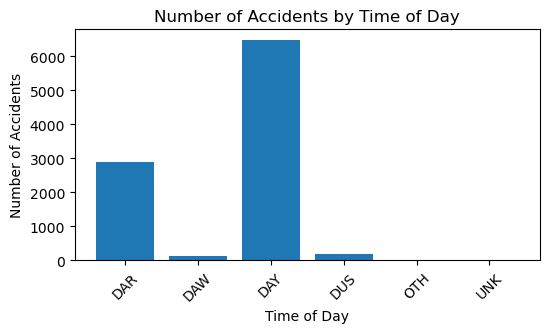

In [16]:
# plotting accident freq by time of day
plt.figure(figsize=(6,3))
plt.bar(accident_lighting["day_night"],accident_lighting["Count"],align= "center")
plt.title("Number of Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation = 45)
plt.savefig("Number of Accidents by Time of Day.png")
plt.show

Description: This is a bar chart comparing time of day with counts of accidents in the vegas area, using time of day for the x variable and count of accidents for y variable. 

In [17]:
# pulls counts of accidents by street names
accident_int = clean_traffic_data.groupby(["Primary_St"])["Primary_St"].value_counts()
accident_int 

Primary_St
28TH ST                2
30TH ST                1
ALPINE PL              1
ALTA DR               61
AMY OLIVIA AVE         1
                      ..
WINDROSE POINT AVE     1
WING ST                1
WOODBRIDGE DR          1
WOODLAND RIDGE ST      1
WYANDOTTE ST           1
Name: count, Length: 647, dtype: int64

In [18]:
# pulling top streets by accident count into data frame
accident_int = pd.DataFrame(accident_int)
accident_int = accident_int.sort_values("count", ascending=False)
accident_int.head(3)


,count
Primary_St,
IR15N,960
US95S,700
US95N,596


In [19]:
# creating data frame for accident street
accident_street_df = clean_traffic_data[[ "County", "Age", "Latitude","Longitude", "Primary_St"]].copy()
accident_street_df

,County,Age,Latitude,Longitude,Primary_St
0,CLARK,49,-115.296856,36.282588,ECHELON POINT DR
1,CLARK,22,-115.305960,36.313917,GRAND CANYON DR
2,CLARK,22,-115.266269,36.279880,SKY POINTE DR
4,CLARK,27,-115.312353,36.327534,US95N
6,CLARK,26,-115.146042,36.160959,GASS AVE
...,...,...,...,...,...
12714,CLARK,38,-115.252436,36.262845,SR599N TO ANN RD INT90B
12715,CLARK,24,-115.260731,36.203052,N BUFFALO DR
12716,CLARK,68,-115.329666,36.239294,CLIFF SHADOWS PKWY
12717,CLARK,65,-115.322318,36.218215,CHEYENNE AVE


### Narrow down the accident_street_df to show top 10 streets that had accidents

In [20]:
# merging data frames 
clean_accident_data_merge = pd.merge(accident_street_df, accident_int, how="left", on=["Primary_St", "Primary_St"])
clean_accident_data_merge = pd.DataFrame(clean_accident_data_merge)
clean_accident_data_merge.head(3)

,County,Age,Latitude,Longitude,Primary_St,count
0,CLARK,49,-115.296856,36.282588,ECHELON POINT DR,1
1,CLARK,22,-115.305960,36.313917,GRAND CANYON DR,14
2,CLARK,22,-115.266269,36.279880,SKY POINTE DR,20


In [21]:
# generating number of accidents by age
age_count = clean_accident_data_merge.groupby("Age")["Age"].count()
age_count = age_count.sort_values(ascending=False)
age_count = age_count.head(10)
age_count = pd.DataFrame(age_count)
age_count = age_count
age_count = age_count.rename(columns={"Age":"Count"})
age_count = age_count.reset_index()
age_count = age_count.sort_values("Age",ascending=True)
age_count

,Age,Count
9,18,281
1,19,367
2,20,359
0,21,386
3,22,349
5,23,324
6,24,317
4,25,335
8,26,284
7,27,289


In [22]:
# test code to help, not used

# Age = age_count["Age"]
# unit_labels = [f"{Age} years old" for age in age_count]
# plt.pie(age_count["Count"], autopct='%1.f%%' ,labels=age_count["Age"])
# plt.title("Top 10 Accident  by Ages ")
# plt.xlabel("Age")


# plt.show()


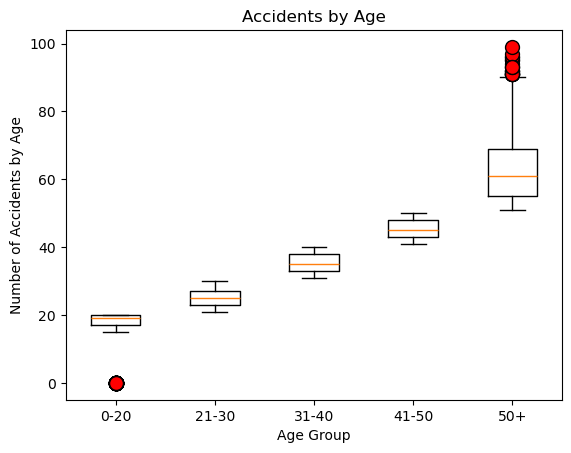

In [23]:
# creating box plot with outliers age statistics 
twenty = clean_traffic_data["Age"][(clean_traffic_data["Age"] >= 0) & (clean_traffic_data["Age"] <= 20)]
thirty = clean_traffic_data["Age"][(clean_traffic_data["Age"] > 20) & (clean_traffic_data["Age"] <= 30)]
forty = clean_traffic_data["Age"][(clean_traffic_data["Age"] > 30) & (clean_traffic_data["Age"] <= 40)]
fifty = clean_traffic_data["Age"][(clean_traffic_data["Age"] > 40) & (clean_traffic_data["Age"] <= 50)]
fifty_plus = clean_traffic_data["Age"][(clean_traffic_data["Age"] > 50)]
age_group = ["0-20", "21-30", "31-40", "41-50", "50+"]

plt.boxplot([twenty, thirty, forty, fifty, fifty_plus], 
    labels = ["0-20", "21-30", "31-40", "41-50", "50+"],
    flierprops={'marker':"o", 'markersize':10, 'markerfacecolor':'red'})

plt.xlabel("Age Group")
plt.ylabel("Number of Accidents by Age")
plt.title("Accidents by Age")
plt.savefig("Accident Weather Condtion by Age.png")
plt.show()

Despriction: Box plot for comapring statistical analysis of specific age groups compared to number of total accidents, age group break down on the x axis and count of accidents generating y axis.

In [24]:
# calling top ten streets with most accidents
top_street_df = clean_accident_data_merge.loc[(clean_accident_data_merge["count"] >= 149)]
top_street_df = pd.DataFrame(top_street_df)
top_street_df

,County,Age,Latitude,Longitude,Primary_St,count
3,CLARK,27,-115.312353,36.327534,US95N,596
6,CLARK,23,-115.165380,36.150421,IR15N,960
8,CLARK,22,-115.166759,36.148856,IR15N,960
9,CLARK,46,-115.163842,36.152167,IR15N,960
10,CLARK,25,-115.165478,36.150309,IR15N,960
...,...,...,...,...,...,...
9676,CLARK,35,-115.115841,36.167172,EASTERN AVE,153
9680,CLARK,36,-115.173848,36.140799,IR15N,960
9682,CLARK,28,-115.175425,36.139011,IR15N,960
9683,CLARK,39,-115.174834,36.139682,IR15N,960


In [25]:
#Set parameters to search for a street

params = {
    "apiKey": geoapify_key,
    "mode": "drive"
    }

for index, row in top_street_df.iterrows():
    #get latidude and longitude from DataRFrame
    lat = row["Latitude"]
    lng = row ["Longitude"]

    # Add waypoints current street's latitude and longitude to the params dictionary
    params["waypoints"] = f"circle:{lng},{lat}"

base_url = " https://api.geoapify.com/v1/mapmatching"

# Make and API request using the params dictionaty
street_address = requests.get(base_url, params=params)
    
# Convert the API response to JSON format
street_address = street_address.json()
    
# Display sample data
top_street_df

,County,Age,Latitude,Longitude,Primary_St,count
3,CLARK,27,-115.312353,36.327534,US95N,596
6,CLARK,23,-115.165380,36.150421,IR15N,960
8,CLARK,22,-115.166759,36.148856,IR15N,960
9,CLARK,46,-115.163842,36.152167,IR15N,960
10,CLARK,25,-115.165478,36.150309,IR15N,960
...,...,...,...,...,...,...
9676,CLARK,35,-115.115841,36.167172,EASTERN AVE,153
9680,CLARK,36,-115.173848,36.140799,IR15N,960
9682,CLARK,28,-115.175425,36.139011,IR15N,960
9683,CLARK,39,-115.174834,36.139682,IR15N,960


In [47]:
# creating hv plot for data frame above
accidents = top_street_df.hvplot.points(
    y="Longitude",
    x="Latitude",
    geo = True,
    width=800,
    height=400,
    color="Primary_St",
    size="Age",
    tiles="OSM",
    title="Top Ten Streets with the Most Accidents",
    hover_cols = ["Primary_St", "County", "Age"])
plt.savefig("accidents.png")
accidents


KeyboardInterrupt: 

Description: Geo ploting total number of accidents by streets, plotting by top 9 highest frequency accidents streets in the vegas area.

In [27]:
# define function to create linear regression plot
def linear_regression_plot(df, x_col, y_col, title, ylabel, xlabel, color="green"):
    x_data = df[x_col]
    y_data = df[y_col]

    linear_regression = linregress(x_data, y_data)
    plt.scatter(x_data, y_data, facecolors=color, edgecolors="black")

    linear_equation = linear_regression.slope * x_data + linear_regression.intercept

    plt.plot(x_data, linear_equation, "-", color="Orange")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

   # defining r value 
    r = linear_regression.rvalue
    print(f"The r value is: {round(r,4)}")
    
    plt.show()
plt.savefig("linear_regression_plot.png")

<Figure size 640x480 with 0 Axes>

The r value is: -0.0724


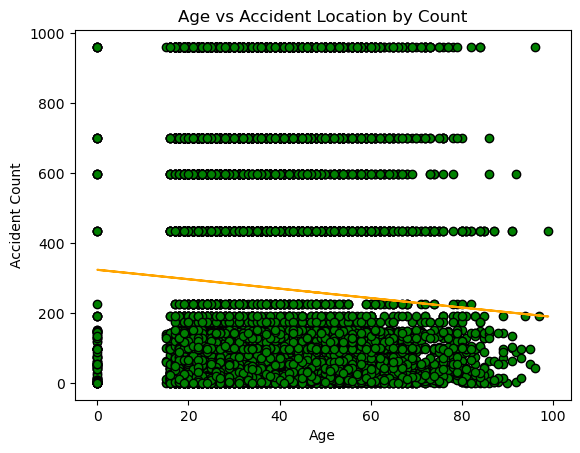

In [28]:
# using defined function above to plot graph with linear regression line
linear_regression_plot(clean_accident_data_merge,"Age","count","Age vs Accident Location by Count","Accident Count", "Age",color="green")

Description: 

In [29]:
# calling group by for vehicle type vs age
vehicle_type = clean_traffic_data.groupby("Vehicle_Type")["Age"].count().reset_index()
vehicle_type = vehicle_type.sort_values("Age",ascending=False)
vehicle_type = vehicle_type.head(15)
vehicle_type


,Vehicle_Type,Age
36,"SEDAN, 4 DOOR",3992
6,CARRY-ALL,1584
31,PICKUP,1230
44,VAN,395
20,"HATCHBACK, 4 DOOR",385
35,"SEDAN, 2 DOOR",381
18,"HARDTOP, 4 DOOR",348
43,UTILITY,232
34,SEDAN,170
19,"HATCHBACK, 2 DOOR",141


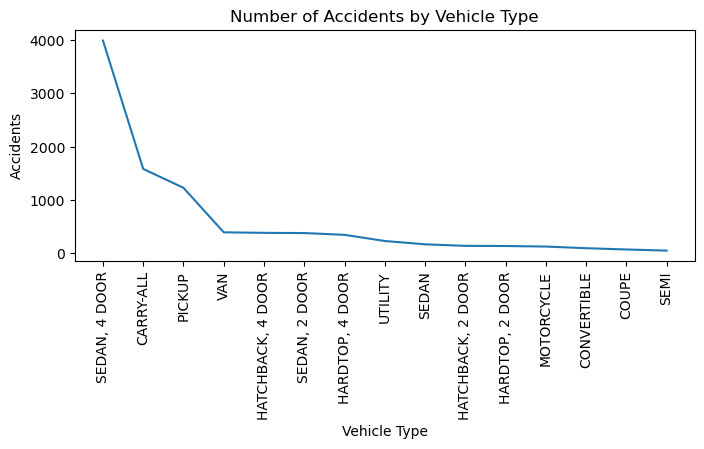

In [30]:
# defining variables for plotting
vehicle = vehicle_type['Vehicle_Type']
Total_accidents = vehicle_type['Age']

# generating line plot
plt. figure(figsize=(8, 3))
plt.plot(vehicle,Total_accidents)
plt.xticks(rotation = 90)
plt.xlabel("Vehicle Type")
plt.ylabel("Accidents")
plt.title("Number of Accidents by Vehicle Type")
plt.savefig("Total_accidents.png")
plt.show()

Description: Line graph showing count of accidents by vehicle type, categorizing by class of vehicle on the x axis and count of accidents on the y axis.

In [31]:
# calling impairment level
clean_traffic_data["driver_impaired"] = ""       

In [32]:
# for loop to determine sober or impaired
for index, x in clean_traffic_data.iterrows():
    if clean_traffic_data.loc[index,"Impairment Level"] == "APPARENTLY NORMAL":
        clean_traffic_data.loc[index,"driver_impaired"] = "Sober"
    else:
        clean_traffic_data.loc[index,"driver_impaired"] = "Impaired"

In [33]:
# creating group by for count of sober or impaired drivers
accident_impaired = clean_traffic_data.groupby("driver_impaired")["driver_impaired"].count()
accident_impaired

driver_impaired
Impaired    1747
Sober       7947
Name: driver_impaired, dtype: int64

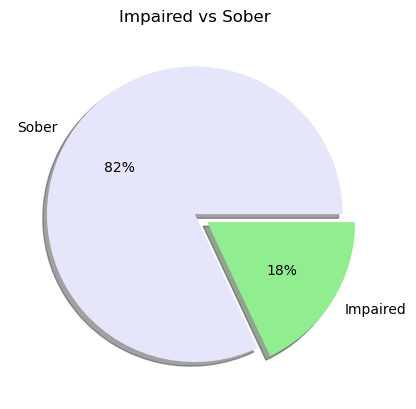

In [34]:
# defining variables for pie chart
impaired = clean_traffic_data["driver_impaired"].unique()
impaired_count = clean_traffic_data["driver_impaired"].value_counts()

# generating pie chart
dict1 = {"Impaired":impaired,
         "Impaired_cnt":impaired_count}

df1 = pd.DataFrame(dict1)
colors = ["Lavender", "Lightgreen"]
plt.pie(df1['Impaired_cnt'],autopct='%1.f%%',labels= df1['Impaired'], explode = (0,0.1), shadow = 170, colors=colors)
plt.title("Impaired vs Sober")
plt.savefig("impaired_count.png")
plt.show()


Description: Pie graph compairing breakdown of broad impairment level across all accidents for the vegas 2016 data, with vast majority of accidents being sober drivers and 18% being impaired of some kind.

In [35]:
# creating data frame for crash type count
crash_type = clean_traffic_data.groupby("Crash Type")["Crash Type"].count()
crash_type = pd.DataFrame(crash_type)
crash_type = crash_type.rename(columns={"Crash Type":"Count"})
crash_type = crash_type.reset_index()
crash_type

,Crash Type,Count
0,ANGLE,3401
1,BACKING,61
2,HEAD-ON,41
3,NON-COLLISION,1550
4,REAR-END,3867
5,REAR-TO-REAR,23
6,"SIDESWIPE, MEETING",112
7,"SIDESWIPE, OVERTAKING",622
8,UNKNOWN,17


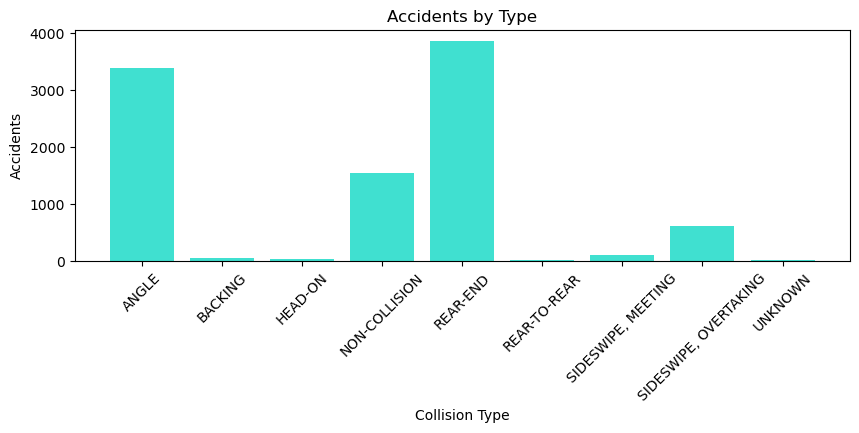

In [36]:
# generating bar chart for crash type
plt.figure(figsize=(10,3))
plt.bar(crash_type["Crash Type"],crash_type["Count"],align= "center", color="turquoise")
plt.title("Accidents by Type")
plt.xlabel("Collision Type")
plt.ylabel("Accidents")
plt.xticks(rotation = 45)
plt.savefig("Accidents by Type.png")
plt.show()

Description: Plotting accident type by total count, categorizing by type of accident on the x axis and total count of accidents on the y axis. Largest individual section of accident type being attributed to rear end collisions.

In [37]:
#What crash was most severe?
    # creating data frame for crash severity off of a groupby
Crash_severity = clean_traffic_data.groupby("Crash Severity").count()
Crash_severity = Crash_severity["County"]
Crash_severity = pd.DataFrame(Crash_severity).reset_index()
Crash_severity = Crash_severity.rename(columns={"County":"Count"})
Crash_severity

,Crash Severity,Count
0,FATAL CRASH,44
1,INJURY CRASH,5399
2,PROPERTY DAMAGE ONLY,4251


In [40]:
# defining weather condition variabels
condition = ["DRY", "ICE", "OTHER","WET"]
four_road_condtion = clean_traffic_data[clean_traffic_data["Road Conditions"].isin(condition)]
len(four_road_condtion)

9694

In [41]:
clean_traffic_data

,County,Fatalities,Injured,Primary_St,Crash Severity,Crash Date,Weather,Crash Type,Vehicle_Type,Impairment Level,Age,Road Conditions,Lighting,Latitude,Longitude,day_night,driver_impaired
0,CLARK,0.0,0,ECHELON POINT DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,REAR-END,"HATCHBACK, 4 DOOR",APPARENTLY NORMAL,49,DRY,DAYLIGHT,-115.296856,36.282588,DAY,Sober
1,CLARK,0.0,1,GRAND CANYON DR,INJURY CRASH,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,22,DRY,DARK - NO LIGHTING,-115.305960,36.313917,DAR,Impaired
2,CLARK,0.0,0,SKY POINTE DR,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 2 DOOR",HAD BEEN DRINKING,22,DRY,DARK - CONTINUOUS LIGHTING,-115.266269,36.279880,DAR,Impaired
4,CLARK,0.0,0,US95N,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,NON-COLLISION,"SEDAN, 4 DOOR",APPARENTLY NORMAL,27,DRY,DARK - NO LIGHTING,-115.312353,36.327534,DAR,Sober
6,CLARK,0.0,0,GASS AVE,PROPERTY DAMAGE ONLY,01/01/2016,CLEAR,ANGLE,"SEDAN, 2 DOOR",HAD BEEN DRINKING: OTHER IMPROPER DRIVING,26,DRY,DARK - CONTINUOUS LIGHTING,-115.146042,36.160959,DAR,Impaired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12714,CLARK,0.0,0,SR599N TO ANN RD INT90B,PROPERTY DAMAGE ONLY,12/31/2016,CLOUDY,REAR-END,CARRY-ALL,APPARENTLY NORMAL,38,DRY,DAYLIGHT,-115.252436,36.262845,DAY,Sober
12715,CLARK,0.0,0,N BUFFALO DR,PROPERTY DAMAGE ONLY,12/31/2016,CLOUDY,NON-COLLISION,"SEDAN, 4 DOOR",HAD BEEN DRINKING,24,DRY,DARK - CONTINUOUS LIGHTING,-115.260731,36.203052,DAR,Impaired
12716,CLARK,0.0,1,CLIFF SHADOWS PKWY,INJURY CRASH,12/31/2016,CLEAR,NON-COLLISION,CONVERTIBLE,"FELL ASLEEP, FAINTED, FATIGUED, ETC.",68,DRY,DAYLIGHT,-115.329666,36.239294,DAY,Impaired
12717,CLARK,0.0,3,CHEYENNE AVE,INJURY CRASH,12/31/2016,CLOUDY,REAR-END,"SEDAN, 4 DOOR",APPARENTLY NORMAL,65,DRY,DARK - CONTINUOUS LIGHTING,-115.322318,36.218215,DAR,Sober


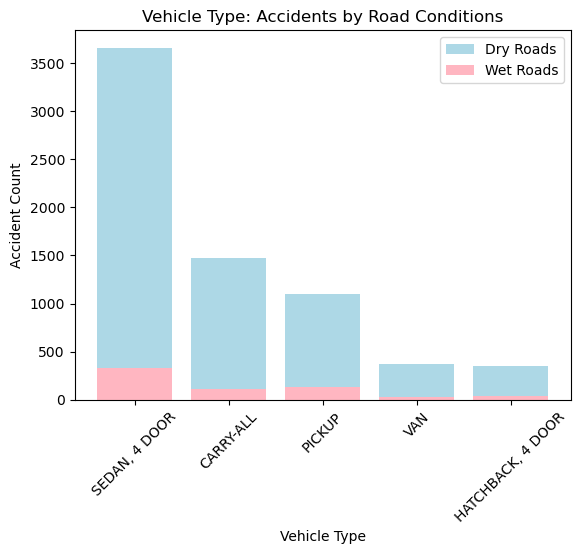

In [43]:
# defining variables for bar chart and merging data frames 
vehicle_x = [0, 1 , 2, 3, 4]
vehicle_names =["SEDAN, 4 DOOR", "CARRY-ALL", "PICKUP", "VAN", "HATCHBACK, 4 DOOR"]
wet_road_condition = clean_traffic_data[clean_traffic_data["Road Conditions"]=="WET"].groupby("Vehicle_Type")["Road Conditions"].count()
wet_road_condition = pd.DataFrame(wet_road_condition).reset_index()
wet_road_condition = wet_road_condition.sort_values("Road Conditions", ascending= False)
wet_road_condition = wet_road_condition.rename(columns={'Road Conditions':'Wet Roads'})
wet_road_condition
dry_road_condition = clean_traffic_data[clean_traffic_data["Road Conditions"]=="DRY"].groupby("Vehicle_Type")["Road Conditions"].count()
dry_road_condition = pd.DataFrame(dry_road_condition).reset_index()
dry_road_condition = dry_road_condition.sort_values("Road Conditions", ascending= False)
dry_road_condition = dry_road_condition.rename(columns={'Road Conditions':'Dry Roads'})
dry_road_condition
vehicle_road_conditions = pd.merge(dry_road_condition,wet_road_condition,how="left",on=["Vehicle_Type","Vehicle_Type"])
vehicle_road_conditions = vehicle_road_conditions.fillna(0)
vehicle_road_conditions= vehicle_road_conditions.head(5)

# creating bar chart
plt.savefig("vehicle_road_conditions.png")
plt.bar(vehicle_road_conditions.index, vehicle_road_conditions["Dry Roads"], label="Dry Roads", color="lightblue")
plt.bar(vehicle_road_conditions.index, vehicle_road_conditions["Wet Roads"], label="Wet Roads", color="lightpink")
plt.title("Vehicle Type: Accidents by Road Conditions")
plt.xlabel("Vehicle Type")
plt.ylabel("Accident Count")
plt.xticks(vehicle_x, vehicle_names, rotation=45)
plt.legend()
plt.savefig("Vehicle Type: Accidents by Road Conditions.png")
plt.show()


Description: Plotting vehicle types by accident count using a bar chart. Categorizing the x axis by vehicle type and the y axis by total count of accidents.

In [44]:
vehicle_road_conditions


,Vehicle_Type,Dry Roads,Wet Roads
0,"SEDAN, 4 DOOR",3660,332.0
1,CARRY-ALL,1474,109.0
2,PICKUP,1097,133.0
3,VAN,368,27.0
4,"HATCHBACK, 4 DOOR",348,37.0


In [45]:
# grouping by specific crash types by time of day
rear_end = clean_traffic_data[clean_traffic_data["Crash Type"]=="REAR-END"].groupby("day_night")["Age"].count()
rear_end = pd.DataFrame(rear_end).reset_index()
rear_end = rear_end.rename(columns={"Age": "Rear End"})

non_collision = clean_traffic_data[clean_traffic_data["Crash Type"]=="NON-COLLISION"].groupby("day_night")["Age"].count()
non_collision = pd.DataFrame(non_collision).reset_index()
non_collision = non_collision.rename(columns={"Age": "Non Collison"})

angle = clean_traffic_data[clean_traffic_data["Crash Type"]=="ANGLE"].groupby("day_night")["Age"].count()
angle = pd.DataFrame(angle).reset_index()
angle = angle.rename(columns={"Age": "Angle"})

rear_to_rear = clean_traffic_data[clean_traffic_data["Crash Type"]=="REAR-TO-REAR"].groupby("day_night")["Age"].count()
rear_to_rear = pd.DataFrame(rear_to_rear).reset_index()
rear_to_rear = rear_to_rear.rename(columns={"Age": "Rear to Rear"})

sideswipe_meeting = clean_traffic_data[clean_traffic_data["Crash Type"]=="SIDESWIPE, MEETING"].groupby("day_night")["Age"].count()
sideswipe_meeting = pd.DataFrame(sideswipe_meeting).reset_index()
sideswipe_meeting = sideswipe_meeting.rename(columns={"Age": "Sideswipe Meeting"})

sideswipe_overtaking = clean_traffic_data[clean_traffic_data["Crash Type"]=="SIDESWIPE, OVERTAKING"].groupby("day_night")["Age"].count()
sideswipe_overtaking = pd.DataFrame(sideswipe_overtaking).reset_index()
sideswipe_overtaking = sideswipe_overtaking.rename(columns={"Age": "Sideswipe Overtaking"})

head_on = clean_traffic_data[clean_traffic_data["Crash Type"]=="HEAD-ON"].groupby("day_night")["Age"].count()
head_on = pd.DataFrame(head_on).reset_index()
head_on = head_on.rename(columns={"Age": "Head On"})

backing = clean_traffic_data[clean_traffic_data["Crash Type"]=="BACKING"].groupby("day_night")["Age"].count()
backing = pd.DataFrame(backing).reset_index()
backing = backing.rename(columns={"Age": "Backing"})

# merging into one data frame
crash_type_light = pd.merge(rear_end,non_collision,how="left",on=["day_night","day_night"])
crash_type_light = pd.merge(crash_type_light,angle,how="left",on=["day_night","day_night"])
crash_type_light = pd.merge(crash_type_light,rear_to_rear,how="left",on=["day_night","day_night"])
crash_type_light = pd.merge(crash_type_light,sideswipe_meeting,how="left",on=["day_night","day_night"])
crash_type_light = pd.merge(crash_type_light,sideswipe_overtaking,how="left",on=["day_night","day_night"])
crash_type_light = pd.merge(crash_type_light,head_on,how="left",on=["day_night","day_night"])
crash_type_light = pd.merge(crash_type_light,backing,how="left",on=["day_night","day_night"])

# filling NaN cells with 0 int values
crash_type_light["Head On"] = crash_type_light["Head On"].fillna(0)
crash_type_light["Sideswipe Meeting"] = crash_type_light["Sideswipe Meeting"].fillna(0)
crash_type_light["Backing"] = crash_type_light["Backing"].fillna(0)

crash_type_light
# Is there a correlation between the time of day and the accidents causation?



,day_night,Rear End,Non Collison,Angle,Rear to Rear,Sideswipe Meeting,Sideswipe Overtaking,Head On,Backing
0,DAR,949,731,951,7,31.0,177,17.0,24.0
1,DAW,40,44,44,1,2.0,14,0.0,0.0
2,DAY,2808,750,2334,14,79.0,415,23.0,36.0
3,DUS,70,24,70,1,0.0,16,1.0,1.0


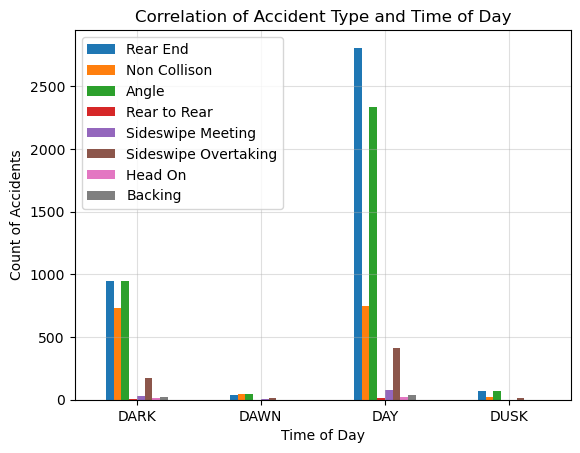

In [46]:
# defining variables for bar chart
x_variable = crash_type_light[["Rear End", "Non Collison", "Angle", "Rear to Rear", "Sideswipe Meeting", "Sideswipe Overtaking", "Head On", "Backing"]]
x_variable = crash_type_light[["Rear End", "Non Collison", "Angle", "Rear to Rear", "Sideswipe Meeting", "Sideswipe Overtaking", "Head On", "Backing"]]

# generating bar chart for analysis
x_variable.plot.bar()
x = [0,1,2,3]
label = ['DARK', 'DAWN', 'DAY', 'DUSK']
plt.xticks(x,label,rotation= 0)
plt.title("Correlation of Accident Type and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count of Accidents")
plt.grid(alpha=0.4)
plt.savefig("Correlation of Accident Type and Time of Day.png")
plt.show()


Description: Categorizing accident types by time of day. Seperating time of day into four categories on the x axis and plotting count of accident type on the y axis. Included is a legend to help further break down the data into seperate accident types.